In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Preparation and Cleaning

In [2]:
df = pd.read_csv("ExtractedSongInformation\\SpotifySongs.csv")
df.head()

,Index,EndTime,SongName,ArtistName,msPlayed,Popularity,SongID,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,0,2021-02-02 02:08,Saiyaan Ji,Yo Yo Honey Singh,64760,62,39QJ7KkN3L8LLqQqsO85W1,0.896,0.678,0,-2.546,0,0.0815,0.0137,0.000041,0.1100,0.604,130.024,205450
1,1,2021-02-02 02:09,Falling,Trevor Daniel,23970,84,0Aqi7ArnBrGblW5T6p2jmD,0.785,0.431,10,-8.756,0,0.0364,0.1230,0.000000,0.0887,0.236,127.085,159382
2,2,2021-02-02 02:09,Shayad,Pritam,6210,72,1smFN2CLqGROu0J0UyvDfL,0.483,0.468,8,-7.642,1,0.0341,0.7850,0.000000,0.1520,0.319,135.864,247941
3,3,2021-02-02 02:14,"Malang (Title Track) [From ""Malang - Unleash T...",Ved Sharma,287374,68,25MPTnqXQB1H6OkwSYUXWx,0.384,0.728,7,-6.503,0,0.0623,0.3290,0.000018,0.3290,0.311,156.396,287374
4,4,2021-02-02 02:14,Genda Phool (feat. Payal Dev),Badshah,27705,67,0gzu5mm36VJH2Zqu8sQPTf,0.955,0.538,1,-8.394,1,0.0734,0.1320,0.001460,0.0704,0.837,116.977,170769


In [3]:
df.shape

(3731, 19)

In [4]:
df.info()
# No null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3731 entries, 0 to 3730
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             3731 non-null   int64  
 1   EndTime           3731 non-null   object 
 2   SongName          3731 non-null   object 
 3   ArtistName        3731 non-null   object 
 4   msPlayed          3731 non-null   int64  
 5   Popularity        3731 non-null   int64  
 6   SongID            3731 non-null   object 
 7   Danceability      3731 non-null   float64
 8   Energy            3731 non-null   float64
 9   Key               3731 non-null   int64  
 10  Loudness          3731 non-null   float64
 11  Mode              3731 non-null   int64  
 12  Speechiness       3731 non-null   float64
 13  Acousticness      3731 non-null   float64
 14  Instrumentalness  3731 non-null   float64
 15  Liveness          3731 non-null   float64
 16  Valence           3731 non-null   float64


In [5]:
# Number of unique elements in our DataFrame
df.nunique()

Index               3731
EndTime             2902
SongName            1063
ArtistName           561
msPlayed            2266
Popularity            77
SongID              1031
Danceability         505
Energy               593
Key                   12
Loudness             973
Mode                   2
Speechiness          570
Acousticness         762
Instrumentalness     455
Liveness             484
Valence              623
Tempo               1000
Duration_ms         1011
dtype: int64

In [6]:
# More specifically how many unique artist, songs
df[["ArtistName", "SongName"]].nunique()
# We only have 514 unique artist and 1011 unique songs

ArtistName     561
SongName      1063
dtype: int64

In [7]:
# Converting the End Time to a pandas datetime object to extract more features out of it
df["EndTime"] = pd.to_datetime(df["EndTime"])

In [8]:
df['Year'] = df["EndTime"].dt.year
df['Month'] = df["EndTime"].dt.month
df['Day'] = df["EndTime"].dt.day
df['Weekday'] = df["EndTime"].dt.dayofweek
df['Day name'] = df["EndTime"].dt.day_name()
df['Time'] = df["EndTime"].dt.time
df['Hours'] = df["EndTime"].dt.hour
df['Count'] = 1

In [9]:
df.head()

,Index,EndTime,SongName,ArtistName,msPlayed,Popularity,SongID,Danceability,Energy,Key,...,Tempo,Duration_ms,Year,Month,Day,Weekday,Day name,Time,Hours,Count
0,0,2021-02-02 02:08:00,Saiyaan Ji,Yo Yo Honey Singh,64760,62,39QJ7KkN3L8LLqQqsO85W1,0.896,0.678,0,...,130.024,205450,2021,2,2,1,Tuesday,02:08:00,2,1
1,1,2021-02-02 02:09:00,Falling,Trevor Daniel,23970,84,0Aqi7ArnBrGblW5T6p2jmD,0.785,0.431,10,...,127.085,159382,2021,2,2,1,Tuesday,02:09:00,2,1
2,2,2021-02-02 02:09:00,Shayad,Pritam,6210,72,1smFN2CLqGROu0J0UyvDfL,0.483,0.468,8,...,135.864,247941,2021,2,2,1,Tuesday,02:09:00,2,1
3,3,2021-02-02 02:14:00,"Malang (Title Track) [From ""Malang - Unleash T...",Ved Sharma,287374,68,25MPTnqXQB1H6OkwSYUXWx,0.384,0.728,7,...,156.396,287374,2021,2,2,1,Tuesday,02:14:00,2,1
4,4,2021-02-02 02:14:00,Genda Phool (feat. Payal Dev),Badshah,27705,67,0gzu5mm36VJH2Zqu8sQPTf,0.955,0.538,1,...,116.977,170769,2021,2,2,1,Tuesday,02:14:00,2,1


In [10]:
df.columns

Index(['Index', 'EndTime', 'SongName', 'ArtistName', 'msPlayed', 'Popularity',
       'SongID', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Year', 'Month', 'Day', 'Weekday',
       'Day name', 'Time', 'Hours', 'Count'],
      dtype='object')

In [11]:
df.columns

Index(['Index', 'EndTime', 'SongName', 'ArtistName', 'msPlayed', 'Popularity',
       'SongID', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Year', 'Month', 'Day', 'Weekday',
       'Day name', 'Time', 'Hours', 'Count'],
      dtype='object')

In [12]:
df["Time Played (HH-MM-SS)"] = pd.to_timedelta(df["msPlayed"], unit="ms")

In [13]:
df.head()

,Index,EndTime,SongName,ArtistName,msPlayed,Popularity,SongID,Danceability,Energy,Key,...,Duration_ms,Year,Month,Day,Weekday,Day name,Time,Hours,Count,Time Played (HH-MM-SS)
0,0,2021-02-02 02:08:00,Saiyaan Ji,Yo Yo Honey Singh,64760,62,39QJ7KkN3L8LLqQqsO85W1,0.896,0.678,0,...,205450,2021,2,2,1,Tuesday,02:08:00,2,1,0 days 00:01:04.760000
1,1,2021-02-02 02:09:00,Falling,Trevor Daniel,23970,84,0Aqi7ArnBrGblW5T6p2jmD,0.785,0.431,10,...,159382,2021,2,2,1,Tuesday,02:09:00,2,1,0 days 00:00:23.970000
2,2,2021-02-02 02:09:00,Shayad,Pritam,6210,72,1smFN2CLqGROu0J0UyvDfL,0.483,0.468,8,...,247941,2021,2,2,1,Tuesday,02:09:00,2,1,0 days 00:00:06.210000
3,3,2021-02-02 02:14:00,"Malang (Title Track) [From ""Malang - Unleash T...",Ved Sharma,287374,68,25MPTnqXQB1H6OkwSYUXWx,0.384,0.728,7,...,287374,2021,2,2,1,Tuesday,02:14:00,2,1,0 days 00:04:47.374000
4,4,2021-02-02 02:14:00,Genda Phool (feat. Payal Dev),Badshah,27705,67,0gzu5mm36VJH2Zqu8sQPTf,0.955,0.538,1,...,170769,2021,2,2,1,Tuesday,02:14:00,2,1,0 days 00:00:27.705000


In [14]:
def hours(td):
    '''To get the hour information'''
    return td.seconds / 3600


def minutes(td):
    '''To get the minutes information'''
    return (td.seconds / 60) % 60


df["Listening Time (Hours)"] = df["Time Played (HH-MM-SS)"].apply(hours).round(
    3)
df["Listening Time (Minutes)"] = df["Time Played (HH-MM-SS)"].apply(
    minutes).round(3)

In [15]:
df.head()

,Index,EndTime,SongName,ArtistName,msPlayed,Popularity,SongID,Danceability,Energy,Key,...,Month,Day,Weekday,Day name,Time,Hours,Count,Time Played (HH-MM-SS),Listening Time (Hours),Listening Time (Minutes)
0,0,2021-02-02 02:08:00,Saiyaan Ji,Yo Yo Honey Singh,64760,62,39QJ7KkN3L8LLqQqsO85W1,0.896,0.678,0,...,2,2,1,Tuesday,02:08:00,2,1,0 days 00:01:04.760000,0.018,1.067
1,1,2021-02-02 02:09:00,Falling,Trevor Daniel,23970,84,0Aqi7ArnBrGblW5T6p2jmD,0.785,0.431,10,...,2,2,1,Tuesday,02:09:00,2,1,0 days 00:00:23.970000,0.006,0.383
2,2,2021-02-02 02:09:00,Shayad,Pritam,6210,72,1smFN2CLqGROu0J0UyvDfL,0.483,0.468,8,...,2,2,1,Tuesday,02:09:00,2,1,0 days 00:00:06.210000,0.002,0.100
3,3,2021-02-02 02:14:00,"Malang (Title Track) [From ""Malang - Unleash T...",Ved Sharma,287374,68,25MPTnqXQB1H6OkwSYUXWx,0.384,0.728,7,...,2,2,1,Tuesday,02:14:00,2,1,0 days 00:04:47.374000,0.080,4.783
4,4,2021-02-02 02:14:00,Genda Phool (feat. Payal Dev),Badshah,27705,67,0gzu5mm36VJH2Zqu8sQPTf,0.955,0.538,1,...,2,2,1,Tuesday,02:14:00,2,1,0 days 00:00:27.705000,0.008,0.450


In [16]:
df.tail()

,Index,EndTime,SongName,ArtistName,msPlayed,Popularity,SongID,Danceability,Energy,Key,...,Month,Day,Weekday,Day name,Time,Hours,Count,Time Played (HH-MM-SS),Listening Time (Hours),Listening Time (Minutes)
3726,3726,2021-09-17 09:17:00,Back To Black,Amy Winehouse,241293,79,18XlJEroUwFo0tLZxscgXE,0.766,0.706,7,...,9,17,4,Friday,09:17:00,9,1,0 days 00:04:01.293000,0.067,4.017
3727,3727,2021-09-17 09:20:00,Where Do We Go From Here,Charles Bradley,191337,69,0fsEFwLSJTSHSawhe864Cp,0.735,0.784,11,...,9,17,4,Friday,09:20:00,9,1,0 days 00:03:11.337000,0.053,3.183
3728,3728,2021-09-17 09:25:00,Way down We Go - Stripped,KALEO,208213,60,5I2UElY0XPnPhQhBTxBcq3,0.701,0.463,6,...,9,17,4,Friday,09:25:00,9,1,0 days 00:03:28.213000,0.058,3.467
3729,3729,2021-09-17 09:28:00,Let's Talk It Over,Lee Fields,180200,54,0o2lMW2T77pq8utWLQ4b2U,0.595,0.628,1,...,9,17,4,Friday,09:28:00,9,1,0 days 00:03:00.200000,0.050,3.000
3730,3730,2021-09-17 09:34:00,The Gentle Rain - RJD2 Remix,Astrud Gilberto,359413,56,5TuICc3rZeDaNP7mpRqlFj,0.544,0.152,4,...,9,17,4,Friday,09:34:00,9,1,0 days 00:05:59.413000,0.100,5.983


In [17]:
df.columns

Index(['Index', 'EndTime', 'SongName', 'ArtistName', 'msPlayed', 'Popularity',
       'SongID', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Year', 'Month', 'Day', 'Weekday',
       'Day name', 'Time', 'Hours', 'Count', 'Time Played (HH-MM-SS)',
       'Listening Time (Hours)', 'Listening Time (Minutes)'],
      dtype='object')

In [18]:
df.drop(["EndTime", "msPlayed", "Time Played (HH-MM-SS)"],
        axis=1,
        inplace=True)

In [19]:
df.head()

,Index,SongName,ArtistName,Popularity,SongID,Danceability,Energy,Key,Loudness,Mode,...,Year,Month,Day,Weekday,Day name,Time,Hours,Count,Listening Time (Hours),Listening Time (Minutes)
0,0,Saiyaan Ji,Yo Yo Honey Singh,62,39QJ7KkN3L8LLqQqsO85W1,0.896,0.678,0,-2.546,0,...,2021,2,2,1,Tuesday,02:08:00,2,1,0.018,1.067
1,1,Falling,Trevor Daniel,84,0Aqi7ArnBrGblW5T6p2jmD,0.785,0.431,10,-8.756,0,...,2021,2,2,1,Tuesday,02:09:00,2,1,0.006,0.383
2,2,Shayad,Pritam,72,1smFN2CLqGROu0J0UyvDfL,0.483,0.468,8,-7.642,1,...,2021,2,2,1,Tuesday,02:09:00,2,1,0.002,0.100
3,3,"Malang (Title Track) [From ""Malang - Unleash T...",Ved Sharma,68,25MPTnqXQB1H6OkwSYUXWx,0.384,0.728,7,-6.503,0,...,2021,2,2,1,Tuesday,02:14:00,2,1,0.080,4.783
4,4,Genda Phool (feat. Payal Dev),Badshah,67,0gzu5mm36VJH2Zqu8sQPTf,0.955,0.538,1,-8.394,1,...,2021,2,2,1,Tuesday,02:14:00,2,1,0.008,0.450


# Exploratory Data Analysis

## 1. Analysis of Artists

### 1.1 My unique Artists

In [20]:
unique_artists = df["ArtistName"].nunique()  # Number of unique artists' in the artist column
total_artists = df["ArtistName"].count()  # Number of total artists' in the artist column
unique_artist_percentage = (unique_artists / total_artists) * 100
print(unique_artist_percentage)

15.036183328866256


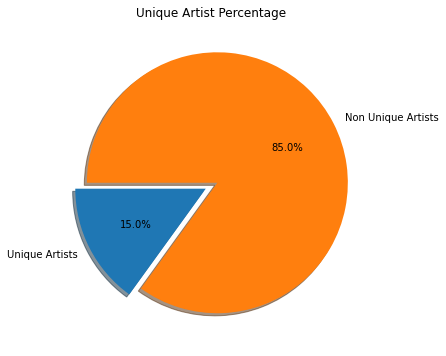

In [21]:
unique_artist_array = np.array([unique_artists, total_artists - unique_artists])
unique_artist_labels = ["Unique Artists", "Non Unique Artists"]

fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(unique_artist_array,
       labels=unique_artist_labels,
       autopct='%1.1f%%',
       explode=[0.05, 0.05],
       startangle=180,
       shadow=True)
plt.title("Unique Artist Percentage")

### 1.2 My top 10 unique Artists'

In [22]:
# Top 10 unique artist by time count
top_artist = df.groupby(["ArtistName"])  # Groups the dataframe by the artist's name
# Choosing to display only 3 columns, finding their sum and sorting their values by Listening Time (Minutes)
top_artist[["Listening Time (Hours)", "Listening Time (Minutes)",
            "Count"]].sum().sort_values(by="Listening Time (Minutes)",
                                        ascending=False).head(10)

,Listening Time (Hours),Listening Time (Minutes),Count
ArtistName,,,
Juice WRLD,6.349,381.933,154
Carlos Rafael Rivera,6.299,378.537,207
The Chainsmokers,3.981,238.708,104
Eminem,3.341,200.684,94
Taylor Swift,2.751,165.336,51
Bruno Mars,2.682,161.296,60
Conan Gray,2.155,128.925,53
Post Malone,2.036,122.151,56
Shawn Mendes,1.966,117.857,53


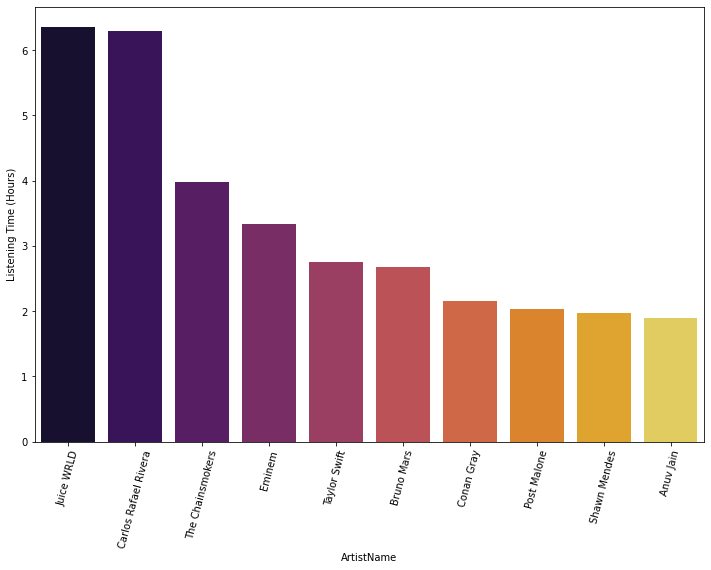

In [23]:
# Visualizing
# Top 10 unique artist by the minutes listened to
top_artist = df.groupby(["ArtistName"])
top_artist = top_artist[["Listening Time (Hours)", "Listening Time (Minutes)", "Count"]].sum()
top_artist = top_artist.sort_values(by="Listening Time (Hours)",
                                    ascending=False)

# The "Artist Name" is the index of the top_artist
plt.figure(figsize=(12, 8))
x_data = top_artist.head(10).index
y_data = top_artist["Listening Time (Hours)"].head(10)
sns.barplot(x=x_data, y=y_data, palette="inferno")
plt.xticks(rotation=75)

In [24]:
# Top 10 unique artist by the number of times played
top_artist = df.groupby(["ArtistName"])
top_artist = top_artist[["Listening Time (Hours)", "Listening Time (Minutes)", "Count"]].sum()
top_artist = top_artist.sort_values(by="Count", ascending=False)
top_artist.head(10)

,Listening Time (Hours),Listening Time (Minutes),Count
ArtistName,,,
Carlos Rafael Rivera,6.299,378.537,207
Juice WRLD,6.349,381.933,154
The Chainsmokers,3.981,238.708,104
Eminem,3.341,200.684,94
Bruno Mars,2.682,161.296,60
Anuv Jain,1.891,112.431,57
Post Malone,2.036,122.151,56
Justin Bieber,1.826,109.813,54
Conan Gray,2.155,128.925,53


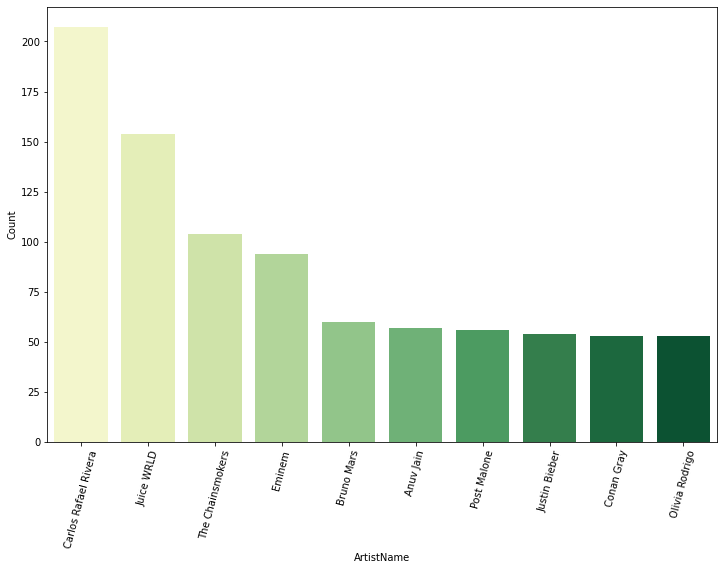

In [25]:
# Visualizing
# Top 10 unique artist by number of times played
top_artist = df.groupby(["ArtistName"])
top_artist = top_artist[["Listening Time (Hours)", "Listening Time (Minutes)", "Count"]].sum()
top_artist = top_artist.sort_values(by="Count", ascending=False)

# The "Artist Name" is the index of the top_artist
plt.figure(figsize=(12, 8))
x_data = top_artist.head(10).index
y_data = top_artist["Count"].head(10)
sns.barplot(x=x_data, y=y_data, palette="YlGn")
plt.xticks(rotation=75)

## 2 Analysis of Songs

## 2.1 My unique songs

In [26]:
unique_songs = df["SongName"].nunique()  # Number of unique songs
total_songs = df["SongName"].count()  # Total number of songs
unique_song_percentage = (unique_songs / total_songs) * 100
print("The percentage of unique songs is:", unique_song_percentage)

The percentage of unique songs is: 28.491021173948006


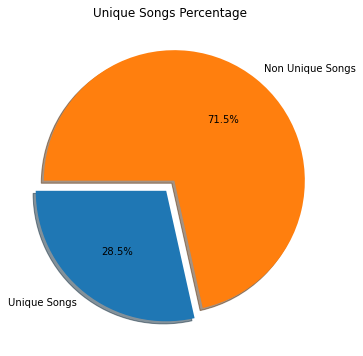

In [27]:
# Well from the looks of it, I don't like new songs I guess
unique_song_array = np.array([unique_songs, total_songs - unique_songs])
unique_song_labels = ["Unique Songs", "Non Unique Songs"]

fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(unique_song_array,
       labels=unique_song_labels,
       autopct='%1.1f%%',
       explode=[0.05, 0.05],
       startangle=180,
       shadow=True)
plt.title("Unique Songs Percentage")

## 2.2 Top 10 listened to Songs

In [28]:
# By minutes
top_songs = df.groupby(["SongName"])
top_songs = top_songs[["Listening Time (Hours)", "Listening Time (Minutes)", "Count"]].sum()
top_songs = top_songs.sort_values(by="Listening Time (Minutes)",
                                  ascending=False)
top_songs.head(10)

,Listening Time (Hours),Listening Time (Minutes),Count
SongName,,,
Baarishein,1.818,108.031,54
Bloodstream,1.791,107.439,24
exile (feat. Bon Iver),1.507,90.616,23
Life's A Mess II (with Clever & Post Malone),1.255,75.594,26
Talking to the Moon,1.169,70.406,21
734,1.096,66.272,26
Hollywood's Bleeding,1.082,65.149,26
Grenade,1.081,64.839,22
good 4 u,1.021,61.756,27


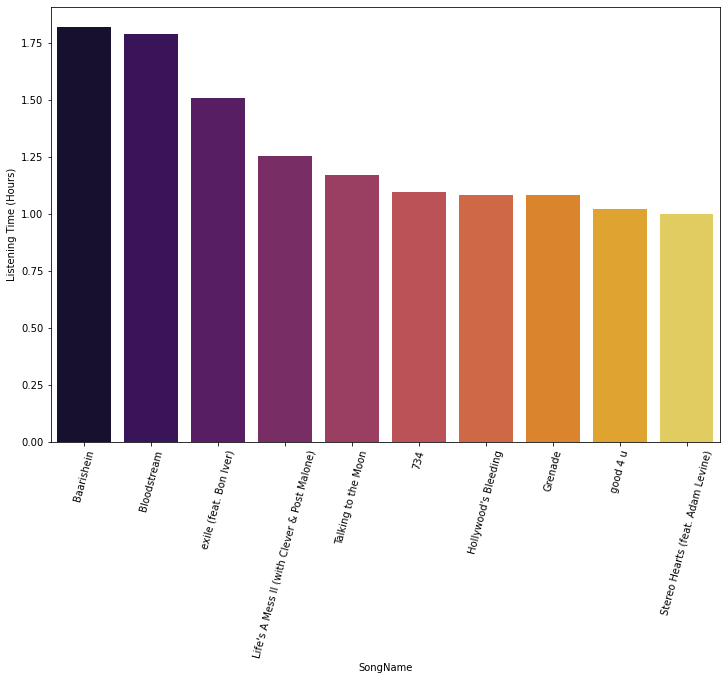

In [29]:
# Visualizing
plt.figure(figsize=(12, 8))
x_data = top_songs.head(10).index
y_data = top_songs["Listening Time (Hours)"].head(10)
sns.barplot(x=x_data, y=y_data, palette="inferno")
plt.xticks(rotation=75)

In [30]:
# By count
top_songs = df.groupby(["SongName"])
top_songs = top_songs[["Listening Time (Hours)", "Listening Time (Minutes)", "Count"]].sum()
top_songs = top_songs.sort_values(by="Count", ascending=False)
top_songs.head(10)

,Listening Time (Hours),Listening Time (Minutes),Count
SongName,,,
Baarishein,1.818,108.031,54
Sygrayem (Let's Play),0.732,44.344,43
good 4 u,1.021,61.756,27
Hollywood's Bleeding,1.082,65.149,26
734,1.096,66.272,26
Life's A Mess II (with Clever & Post Malone),1.255,75.594,26
Element,0.577,34.218,25
Hope,0.779,46.244,25
Into Your Arms (feat. Ava Max),0.806,48.050,25


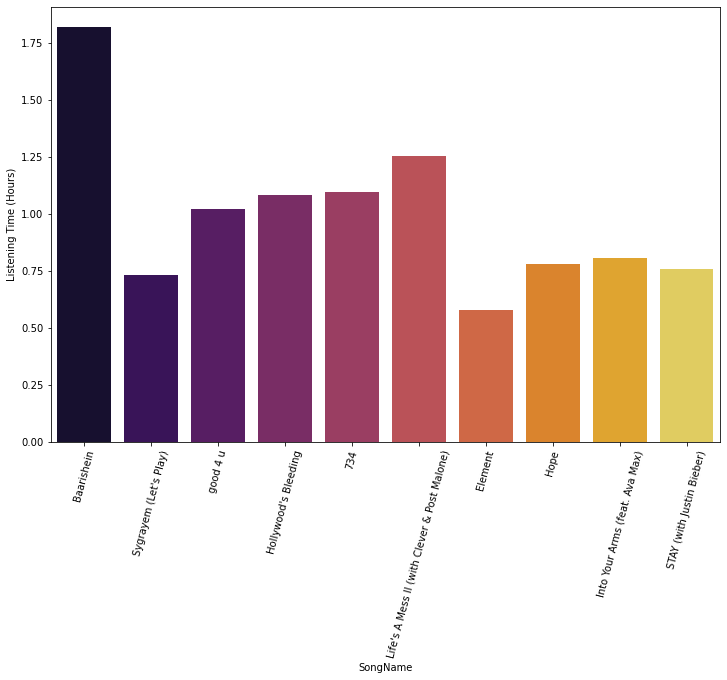

In [31]:
# Visualizing
plt.figure(figsize=(12, 8))
x_data = top_songs.head(10).index
y_data = top_songs["Listening Time (Hours)"].head(10)
sns.barplot(x=x_data, y=y_data, palette="inferno")
plt.xticks(rotation=75)

## 3. Day-wise usage

In [32]:
df["Day name"].value_counts()

Friday       612
Tuesday      602
Thursday     575
Saturday     530
Monday       495
Wednesday    460
Sunday       457
Name: Day name, dtype: int64

<AxesSubplot:>

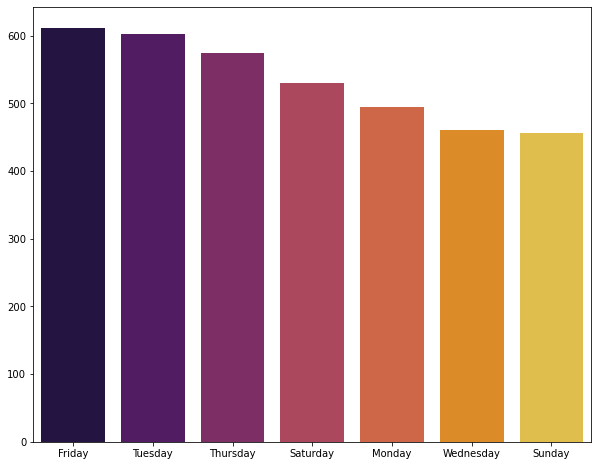

In [33]:
x_data = df["Day name"].value_counts().index
y_data = df["Day name"].value_counts().values
plt.figure(figsize=(10, 8))
sns.barplot(x=x_data, y=y_data, palette="inferno")

## 4. Time during which I mostly listen to songs

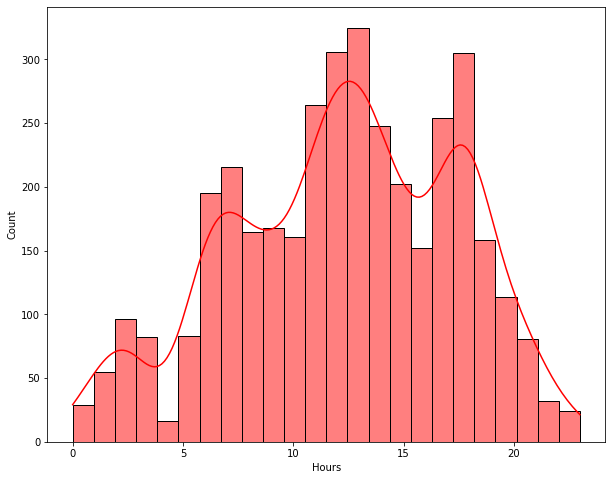

In [34]:
plt.figure(figsize=(10, 8))
sns.histplot(x=df["Hours"], kde=True, fill=True, bins=24, color="red")

## 5. Song Analysis

In [35]:
sorted_df = df.sort_values(by="Popularity", ascending=False)
sorted_df.head()

,Index,SongName,ArtistName,Popularity,SongID,Danceability,Energy,Key,Loudness,Mode,...,Year,Month,Day,Weekday,Day name,Time,Hours,Count,Listening Time (Hours),Listening Time (Minutes)
2095,2095,Fingers Crossed (with Julia Michaels),Trevor Daniel,97,5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,...,2021,7,31,5,Saturday,12:04:00,12,1,0.043,2.583
1977,1977,good 4 u,Olivia Rodrigo,97,5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,...,2021,7,26,0,Monday,12:47:00,12,1,0.049,2.967
2416,2416,Party Girl,StaySolidRocky,97,5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,...,2021,8,12,3,Thursday,11:34:00,11,1,0.041,2.450
2378,2378,Rewrite The Stars,Zac Efron,97,5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,...,2021,8,12,3,Thursday,05:53:00,5,1,0.001,0.033
1833,1833,Real Shit (with benny blanco),Juice WRLD,97,5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,...,2021,7,20,1,Tuesday,10:09:00,10,1,0.023,1.383


In [36]:
# Since most a lot of songs have been repeated, I will first drop the duplicates and then sort by popularity
cleaned_df = df.drop_duplicates(subset=["SongName"])
sorted_df = cleaned_df.sort_values(by="Popularity", ascending=False).head(100)
sorted_df.shape

(100, 27)

In [37]:
# Analyzing the features based on the top 100 songs of my dataset and all the songs in my dataset
audio_features = [
    'Danceability', 'Energy', 'Loudness', 'Mode', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence'
]

# Top 100 songs
features = sorted_df[audio_features].mean().to_list()
# Whole dataset
all_features = df.drop_duplicates(
    subset=["SongName"])[audio_features].mean().to_list()

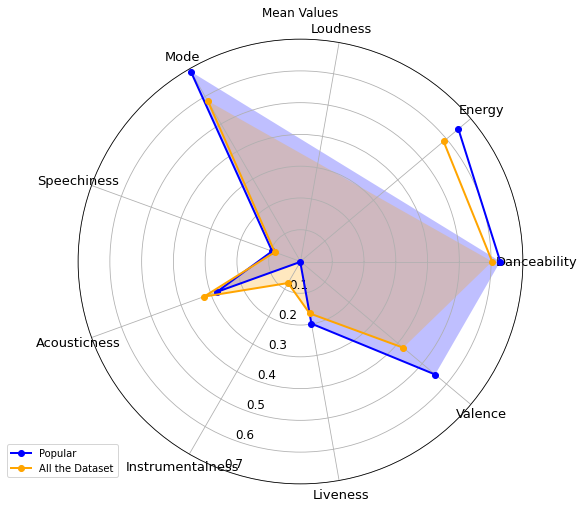

In [38]:
angles = np.linspace(0, 2 * np.pi, len(audio_features), endpoint=False)
fig = plt.figure(figsize=(18, 18))

# Top 100 songs
ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features, 'o-', linewidth=2, label="Popular", color='blue')
ax.fill(angles, features, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180 / np.pi, audio_features, fontsize=13)

ax.set_rlabel_position(250)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
           ["0.1", '0.2', "0.3", "0.4", "0.5", "0.6", '0.7'],
           size=12)
plt.ylim(0, 0.7)

# Whole dataset
ax.plot(angles,
        all_features,
        'o-',
        linewidth=2,
        label="All the Dataset",
        color='orange')
ax.fill(angles, all_features, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

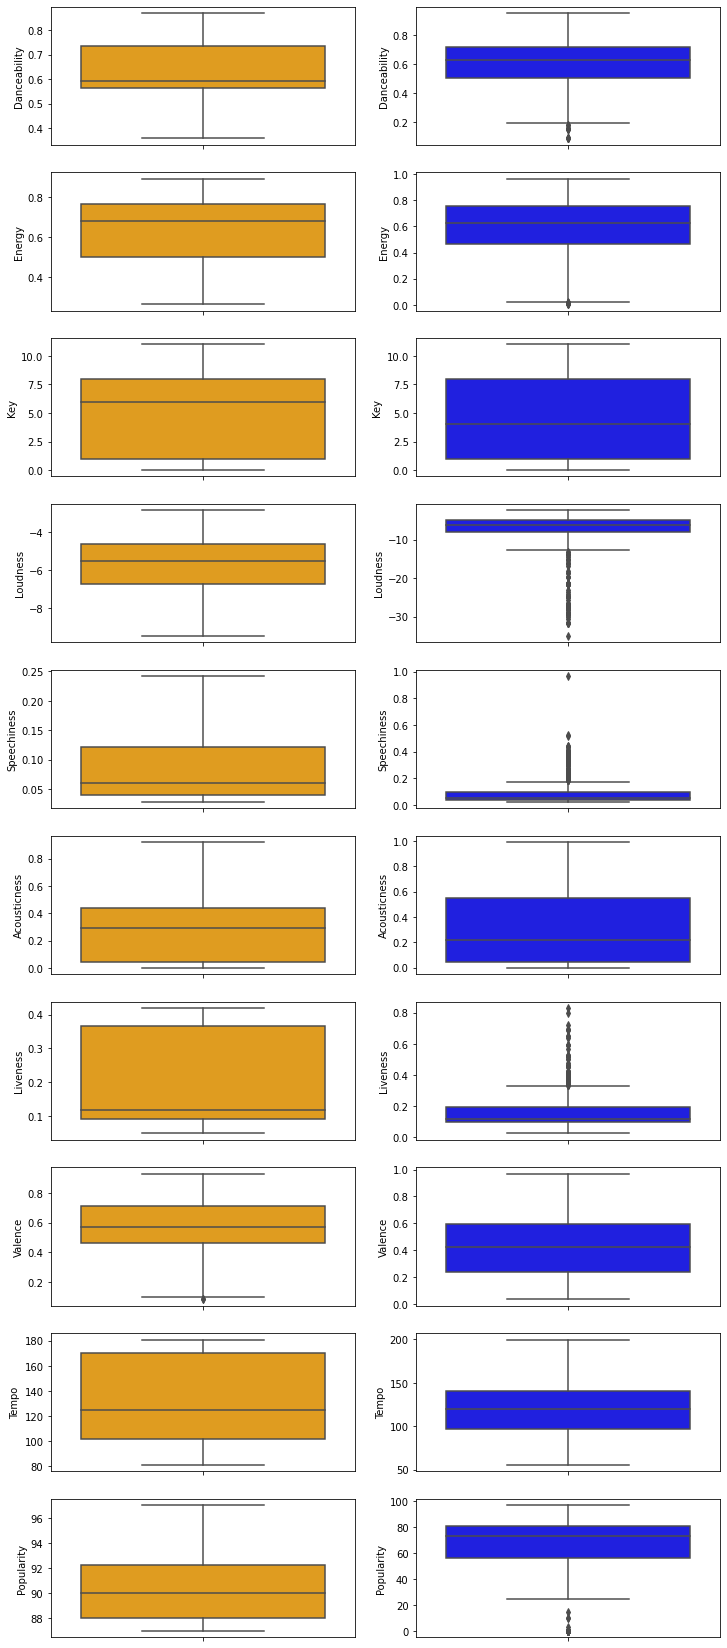

In [39]:
# Comparing the songs through a box plot
audio_features = [
    'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
    'Liveness', 'Valence', 'Tempo', 'Popularity'
]
# cleaned vs sorted
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(12, 30))
for index, axs in enumerate(ax):
    sns.boxplot(y=sorted_df[audio_features[index]], color="Orange", ax=axs[0])
    sns.boxplot(y=cleaned_df[audio_features[index]], color="Blue", ax=axs[1])

## 6. Compairing my songs with spotify 2019 dataset

In [40]:
# Analyzing 2019 spotify data
spotify = pd.read_csv("Spotify\\SpotifyTop50.csv", encoding="ISO-8859-1")
spotify.drop("Unnamed: 0", axis=1, inplace=True)

In [41]:
spotify.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [42]:
spotify_cols = [
    'Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..', 'Liveness',
    'Valence.', 'Acousticness..', 'Speechiness.'
]
spotify[spotify_cols].head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Acousticness..,Speechiness.
0,117,55,76,-6,8,75,4,3
1,105,81,79,-4,8,61,8,9
2,190,80,40,-4,16,70,12,46
3,93,65,64,-8,8,55,12,19
4,150,65,58,-4,11,18,45,7


In [43]:
audio_features = [
    'Tempo', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence',
    'Acousticness', 'Speechiness'
]
# Whole dataset
all_features = df[audio_features].mean().to_list()

In [44]:
spotify_features = spotify[spotify_cols].mean().to_list()
spotify_features[1] = spotify_features[1] / 100
spotify_features[2] = spotify_features[2] / 100
spotify_features[4] = spotify_features[4] / 100
spotify_features[5] = spotify_features[5] / 100
spotify_features[6] = spotify_features[6] / 100
spotify_features[7] = spotify_features[7] / 100

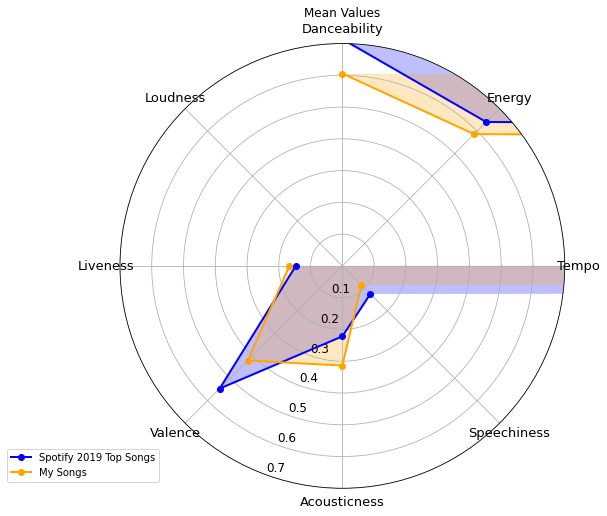

In [45]:
angles = np.linspace(0, 2 * np.pi, len(audio_features), endpoint=False)
fig = plt.figure(figsize=(18, 18))

# Top 50 popular songs
ax = fig.add_subplot(221, polar=True)
ax.plot(angles,
        spotify_features,
        'o-',
        linewidth=2,
        label="Spotify 2019 Top Songs",
        color='blue')
ax.fill(angles, spotify_features, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180 / np.pi, audio_features, fontsize=13)

ax.set_rlabel_position(250)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
           ["0.1", '0.2', "0.3", "0.4", "0.5", "0.6", '0.7'],
           size=12)
plt.ylim(0, 0.7)

# Whole dataset
ax.plot(angles,
        all_features,
        'o-',
        linewidth=2,
        label="My Songs",
        color='orange')
ax.fill(angles, all_features, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))